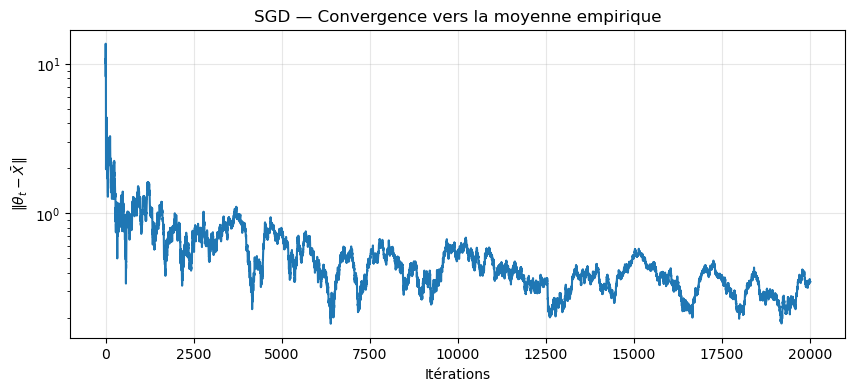

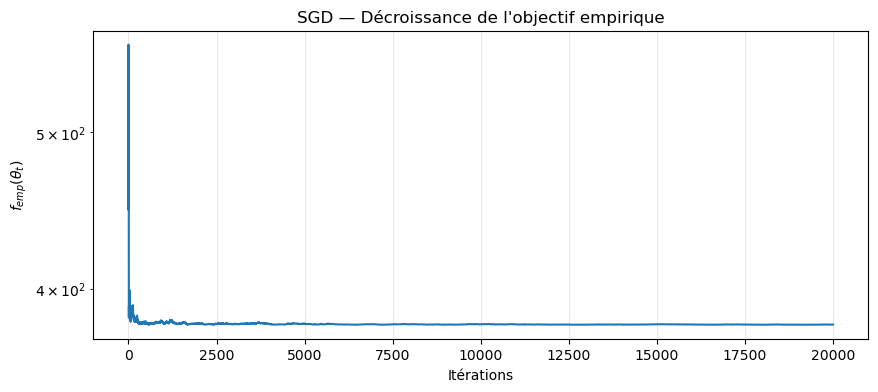

In [7]:
# =========================
# SGD (Robbins–Monro)
# =========================
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

d = 10
n = 5000
sigma = np.linspace(1, 10, d)
mu = np.linspace(-5, 5, d)

X = np.random.normal(loc=mu, scale=sigma, size=(n, d))
mu_emp = X.mean(axis=0)


nmax = 20000
a = 0.3
alpha = 0.7
thetainit = np.zeros(d)


Theta_sgd = np.zeros((nmax + 1, d))
Theta_sgd[0] = thetainit.copy()

# SGD
for t in range(nmax):
    i = np.random.randint(n)
    grad = 2 * (Theta_sgd[t] - X[i])
    eta_t = a / ((t + 1) ** alpha)
    Theta_sgd[t + 1] = Theta_sgd[t] - eta_t * grad

# Erreur et objectif empirique
err_sgd = np.linalg.norm(Theta_sgd - mu_emp[None, :], axis=1)

def f_emp(theta, X):
    return np.mean(np.sum((X - theta) ** 2, axis=1))

f_sgd = np.array([f_emp(theta, X) for theta in Theta_sgd])

# Tracés
plt.figure(figsize=(10, 4))
plt.plot(err_sgd)
plt.yscale("log")
plt.xlabel("Itérations")
plt.ylabel(r"$\|\theta_t - \bar X\|$")
plt.title("SGD — Convergence vers la moyenne empirique")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(f_sgd)
plt.yscale("log")
plt.xlabel("Itérations")
plt.ylabel(r"$f_{emp}(\theta_t)$")
plt.title("SGD — Décroissance de l'objectif empirique")
plt.grid(True, alpha=0.3)
plt.show()


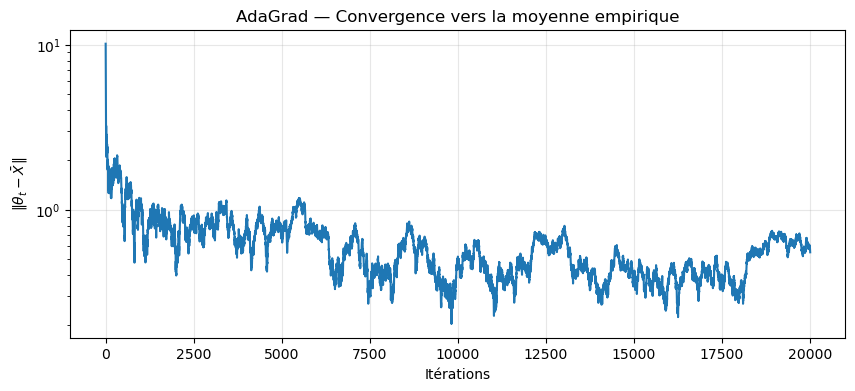

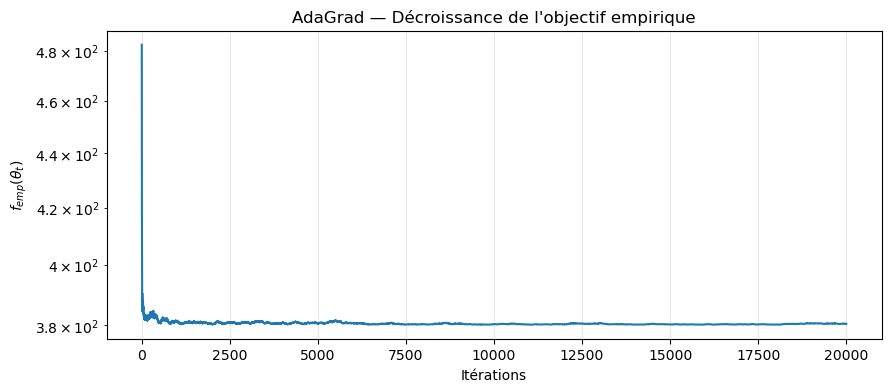

In [9]:
# =========================
# AdaGrad
# =========================

np.random.seed(0)

eta0 = 1.0
eps = 1e-8
thetainit = np.zeros(d)


Theta_ada = np.zeros((nmax + 1, d))
Theta_ada[0] = thetainit.copy()
G = np.zeros(d)


for t in range(nmax):
    i = np.random.randint(n)
    grad = 2 * (Theta_ada[t] - X[i])
    G += grad ** 2
    Theta_ada[t + 1] = Theta_ada[t] - (eta0 / (np.sqrt(G) + eps)) * grad

# Erreur et objectif empirique
err_ada = np.linalg.norm(Theta_ada - mu_emp[None, :], axis=1)
f_ada = np.array([f_emp(theta, X) for theta in Theta_ada])

# Tracés
plt.figure(figsize=(10, 4))
plt.plot(err_ada)
plt.yscale("log")
plt.xlabel("Itérations")
plt.ylabel(r"$\|\theta_t - \bar X\|$")
plt.title("AdaGrad — Convergence vers la moyenne empirique")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(f_ada)
plt.yscale("log")
plt.xlabel("Itérations")
plt.ylabel(r"$f_{emp}(\theta_t)$")
plt.title("AdaGrad — Décroissance de l'objectif empirique")
plt.grid(True, alpha=0.3)
plt.show()
